In [17]:
#Add Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
from citipy import citipy
import gmaps
import gmaps.datasets
import scipy.stats as stats
from datetime import datetime
#import folium

## Importing CSV Data



In [2]:
#Import citation data from csv
citation_raw = pd.read_csv("Parking_Citations.csv")
citation_df = citation_raw

C:\Users\kapali_s\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Name of columns 
#citation_df.columns.tolist()

## Cleaning Columns from Dataset

In [4]:
#Drop columns that are not needed
citation_df1 = citation_df.drop(["Meter Id","Marked Time","RP State Plate","Plate Expiry Date","VIN","Location","Route","Agency","Violation code","Body Style", "Violation Description", "Fine amount"], axis = 1)
citation_df1.head()

#Drop Lat and Lon = 99999
citation_df2 = citation_df1[(citation_df1["Latitude"] !=99999.000) & (citation_df1["Longitude"] !=99999.000)]
citation_df2.head()


,Ticket number,Issue Date,Issue time,Make,Color,Latitude,Longitude
0,1114684152,5/1/2018,1310.0,GMC,BK,6468879.186,1841441.836
39,1121020504,5/1/2018,1100.0,CHEV,SI,6487917.292,1830966.052
41,1116268053,5/1/2018,1211.0,SUBA,RE,6443160.675,1921957.696
45,1117163961,5/1/2018,1045.0,TOYO,BK,6401115.821,1887444.261
46,1117163950,5/1/2018,2135.0,TOYO,GY,6397793.249,1886756.686


In [5]:
citation_df2.count()

Ticket number    419378
Issue Date       419378
Issue time       419303
Make             419187
Color            419316
Latitude         419377
Longitude        419377
dtype: int64

In [6]:
#Take all rows where column values are not equal to zero
citation_df3 = citation_df2[(citation_df2[["Ticket number", "Issue Date","Issue time","Make","Color","Latitude","Longitude",]] != 0)]
citation_df3.head()

,Ticket number,Issue Date,Issue time,Make,Color,Latitude,Longitude
0,1114684152,5/1/2018,1310.0,GMC,BK,6468879.186,1841441.836
39,1121020504,5/1/2018,1100.0,CHEV,SI,6487917.292,1830966.052
41,1116268053,5/1/2018,1211.0,SUBA,RE,6443160.675,1921957.696
45,1117163961,5/1/2018,1045.0,TOYO,BK,6401115.821,1887444.261
46,1117163950,5/1/2018,2135.0,TOYO,GY,6397793.249,1886756.686


In [7]:
#Drop all rows with blank cells
citation_df4 = citation_df3.fillna("")

In [8]:
#citation_df4.count()

In [9]:
citation_df4["Make"].replace("", np.nan, inplace=True)
citation_df4.dropna(subset = ["Make"], inplace = True)

In [10]:
#Sort values by make of car
#citation_df4.sort_values(["Make"],ascending=True)

In [11]:
Sample_data = citation_df4.sample(frac=0.10, random_state = 1 )

In [12]:
Sample_data.head()

,Ticket number,Issue Date,Issue time,Make,Color,Latitude,Longitude
411923,4336360221,7/13/2018,2332,TOYT,BL,6.42472e+06,1.80822e+06
143651,4332707271,5/24/2018,2204,SUBA,WT,6.46008e+06,1.85883e+06
275230,4334502561,6/18/2018,1209,BMW,WT,6.37875e+06,1.8836e+06
272531,4333701352,6/17/2018,2125,HOND,BK,6.45809e+06,1.85907e+06
140789,4333176363,5/24/2018,1646,OTHR,BN,6.48442e+06,1.83663e+06


In [13]:
#Replace duplicates for all makes in top 30
citation_df4["Make"] = citation_df4["Make"].replace({'TOYT': 'TOYOTA', 'TOYO': 'TOYOTA'})
citation_df5 = citation_df4["Make"].value_counts()
citation_df6 = citation_df5.rename_axis('Make').reset_index(name='counts')
citation_df7 = citation_df6.head(25)

In [58]:
citation_df7.head()

,Make,counts
0,TOYOTA,73826
1,HOND,47652
2,FORD,35206
3,NISS,31743
4,CHEV,27727


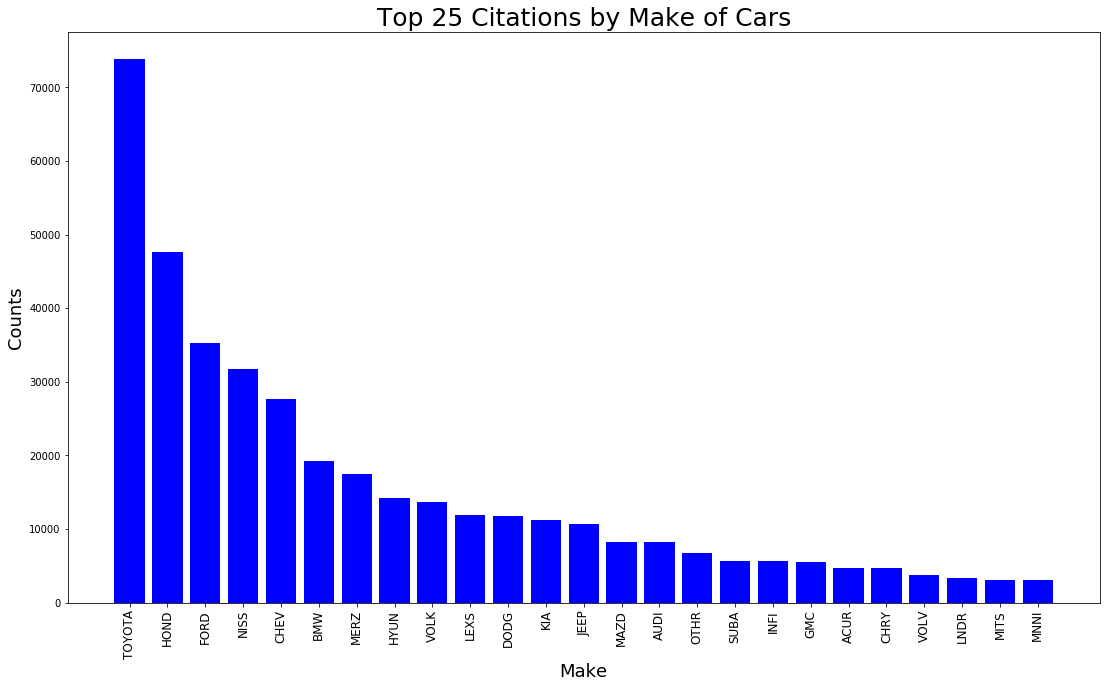

<Figure size 432x288 with 0 Axes>

In [62]:
#Bar plot for top 25 make of vehicles that got citations
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
x_axis=np.arange(len(citation_df7["Make"]))
plt.bar(x_axis,citation_df7["counts"], color="blue" )
plt.xlabel('Make', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.xticks(x_axis, citation_df7["Make"], fontsize=12, rotation=90,)
plt.title('Top 25 Citations by Make of Cars', fontsize=25)
fig.savefig("make_chart.png")
plt.show()
plt.clf()

In [15]:
#Replace duplicates for all makes in top 30
citation_df8 = citation_df4["Color"].value_counts()
citation_df9 = citation_df8.rename_axis('Color').reset_index(name='Counts')
citation_df10 = citation_df9.head(10)

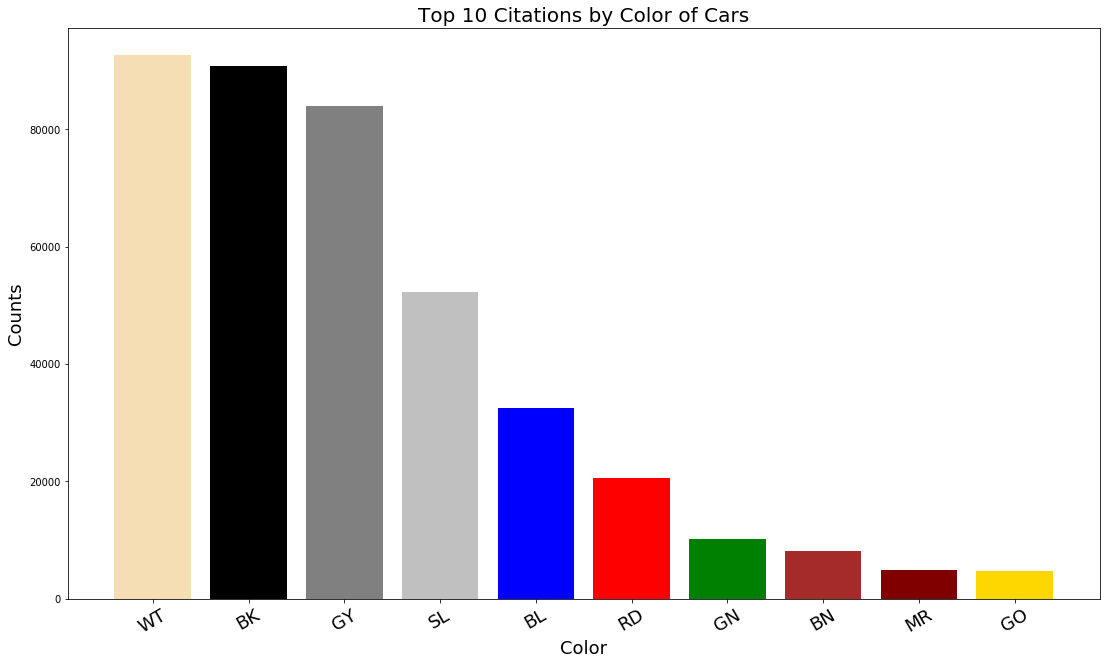

<Figure size 432x288 with 0 Axes>

In [52]:
#Bar plot for top 25 Color of vehicles that got citations
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
x_axis=np.arange(len(citation_df10["Color"]))
plt.bar(x_axis,citation_df10["Counts"], color=('wheat','black',"grey","silver","blue","red","green","brown","maroon","gold","red","tan"))
plt.xlabel('Color', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.xticks(x_axis, citation_df10["Color"], fontsize=18, rotation=30)
plt.title('Top 10 Citations by Color of Cars', fontsize=20)
#plt.figure(figsize=(18,16))
fig.savefig("color_chart.png")
plt.show()
plt.clf()

In [ ]:
plt.clf()

In [ ]:
# Sampling the models of four cars 
df1 = Sample_data[Sample_data.Make.isin(["BMW","FORD","VOLK","DODG"])]
df1.head()

In [ ]:
# Group by make of the cars
df2 = df1.groupby("Make").Make.count()

In [ ]:
Sample_data_large = citation_df4.sample(frac=0.50, random_state = 1 )

In [ ]:
df3 = Sample_data_large[Sample_data_large.Make.isin(["BMW","FORD","VOLK","DODG"])]
df3.info()

In [ ]:
df3 = df3.groupby("Make").Make.count()
df3

In [ ]:
Observed = df2
Observed

In [ ]:
Observed = pd.DataFrame(Observed)
Observed

In [ ]:
Observed.columns.values[0]="Observed"
Observed

In [ ]:
overall_ratio = (df3/len(df3)).round(0)
overall_ratio

In [ ]:
Expected = overall_ratio * len(Observed)
Expected

In [ ]:
Expected= pd.DataFrame(Expected)

In [ ]:
Expected.columns.values[0] = "Expected"
Expected

In [ ]:
Combined =  pd.concat([Observed, Expected], axis = 1)
Combined

In [ ]:
#With fur raws, the degree of freedom is 3
# with a p-value of 0.05, the CL is 1-0.05 = 0.95
Critcal_value = stats.chi2.ppf(q=0.95, df = 3)
Critcal_value

In [ ]:
stats.chisquare(Combined["Observed"], Combined["Expected"])